# question 1

In [ ]:
ya = c(12,9,12,14,13,13,15,8,15,6)
yb = c(11,11,10,9,9,8,7,10,6,8,8,9,7)

na = length(ya)
nb = length(yb)

a = 2
b = 1

alpha = 8
beta = 8

S = 1e3

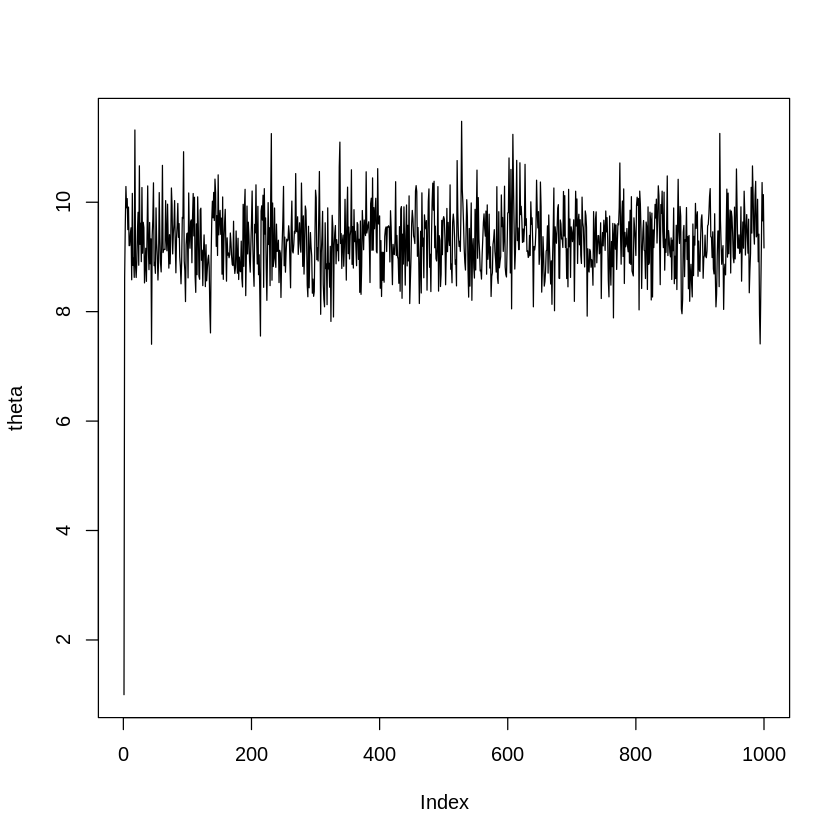

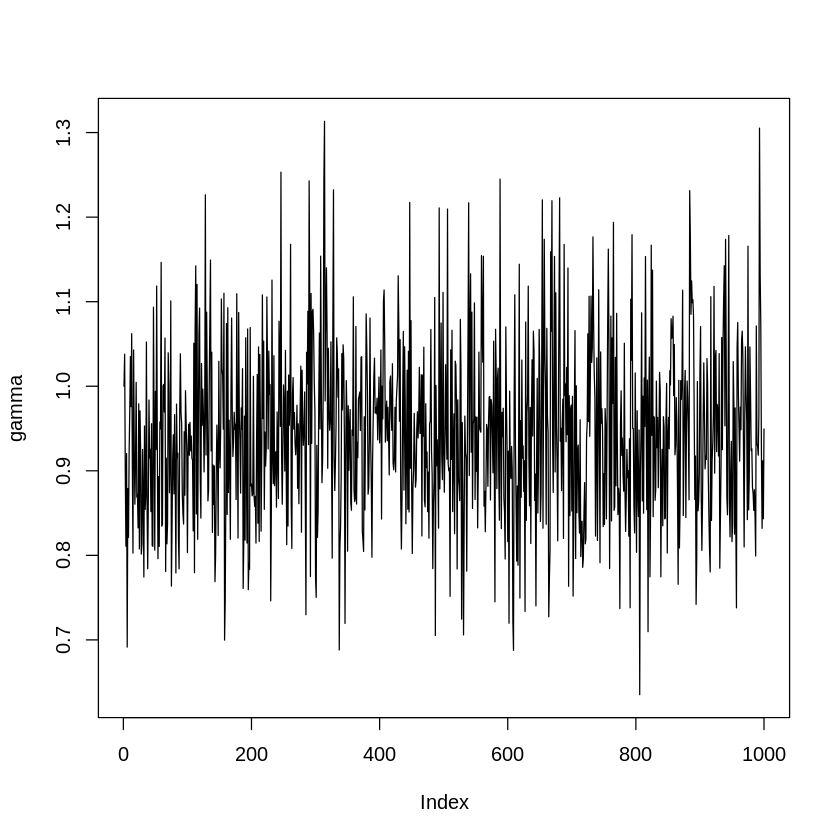

In [ ]:
theta = rep(NA, S)
gamma = rep(NA, S)

theta[1] = 1
gamma[1] = 1

for (iter in 2:S) {
  theta[iter] = rgamma(1, sum(ya) + sum(yb) + a, na + b + nb + gamma[iter - 1])
  gamma[iter] = rgamma(1, sum(yb) + alpha, nb*theta[iter] + beta)
}

plot(theta, type = 'l')
plot(gamma, type = 'l')

In [ ]:
mean(theta[0.1*S:S])
mean(gamma[0.1*S:S])

[1] 9.436095

[1] 0.803251

#question 2

In [ ]:
ya = c(12,9,12,14,13,13,15,8,15,6)
yb = c(11,11,10,9,9,8,7,10,6,8,8,9,7)

na = length(ya)
nb = length(yb)

a = 2
b = 1

alpha = 8
beta = 8

S = 1e3

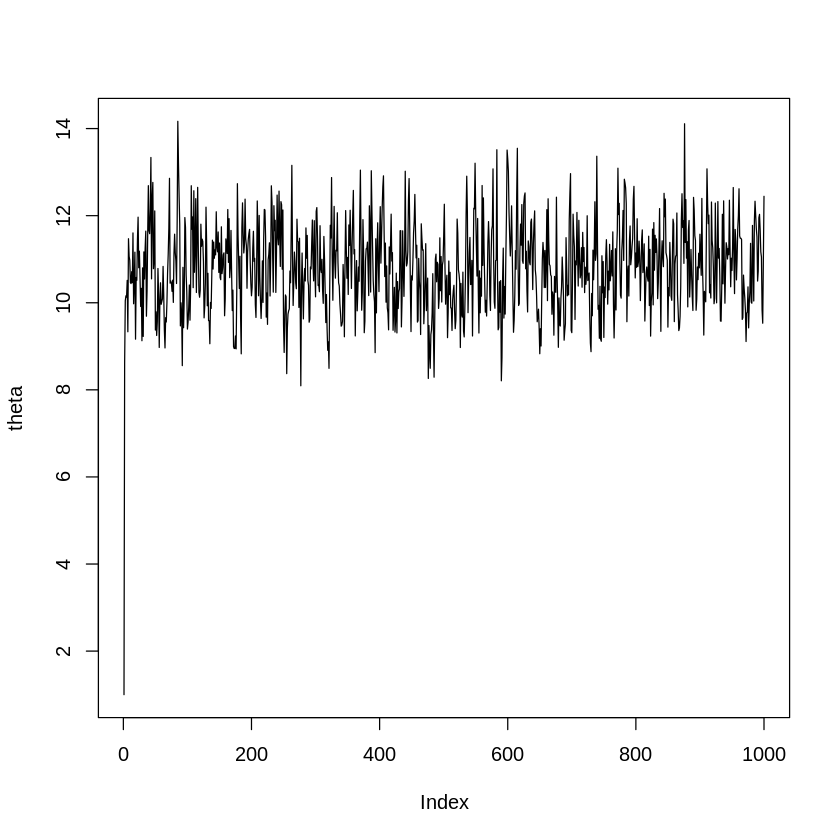

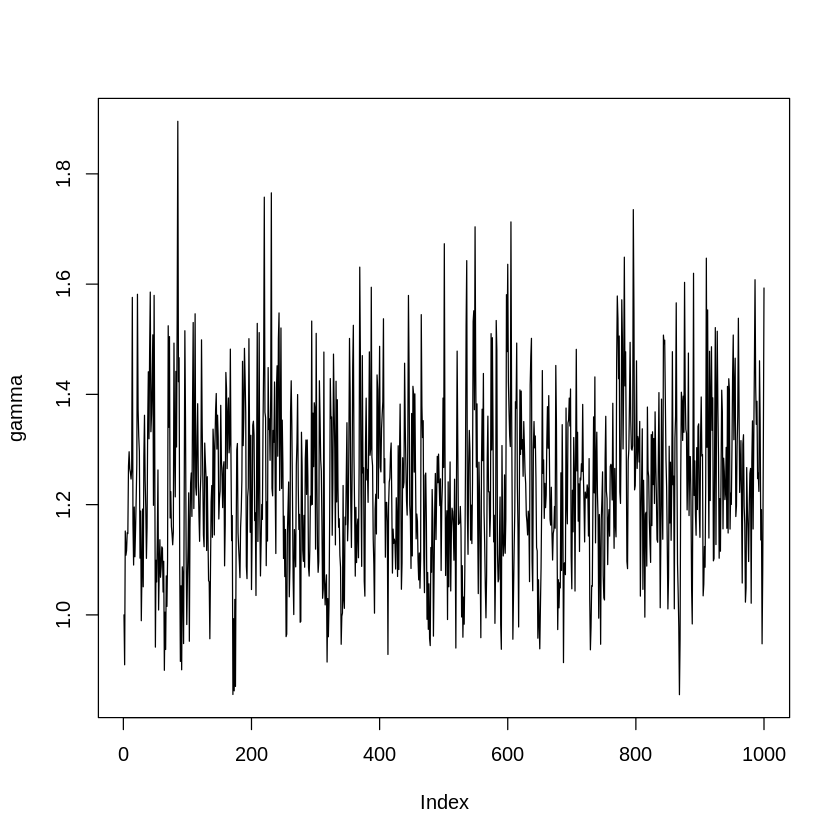

In [ ]:
theta = rep(NA, S)
gamma = rep(NA, S)

theta[1] = 1
gamma[1] = 1


for (iter in 2:S) {
  theta[iter] = rgamma(1, sum(ya) + sum(yb) + a, na + b + nb/gamma[iter - 1])
  gamma[iter] = 1/rgamma(1, sum(yb) + alpha, nb*theta[iter] + beta)
}

plot(theta, type = 'l')
plot(gamma, type = 'l')

In [ ]:
mean(theta[0.1*S:S])
mean(gamma[0.1*S:S])

[1] 9.396341

[1] 1.067161

# question 3

In [ ]:
ya = c(12,9,12,14,13,13,15,8,15,6)
yb = c(11,11,10,9,9,8,7,10,6,8,8,9,7)

na = length(ya)
nb = length(yb)

a = 2
b = 1

alpha = 8
beta = 8

S = 1e3

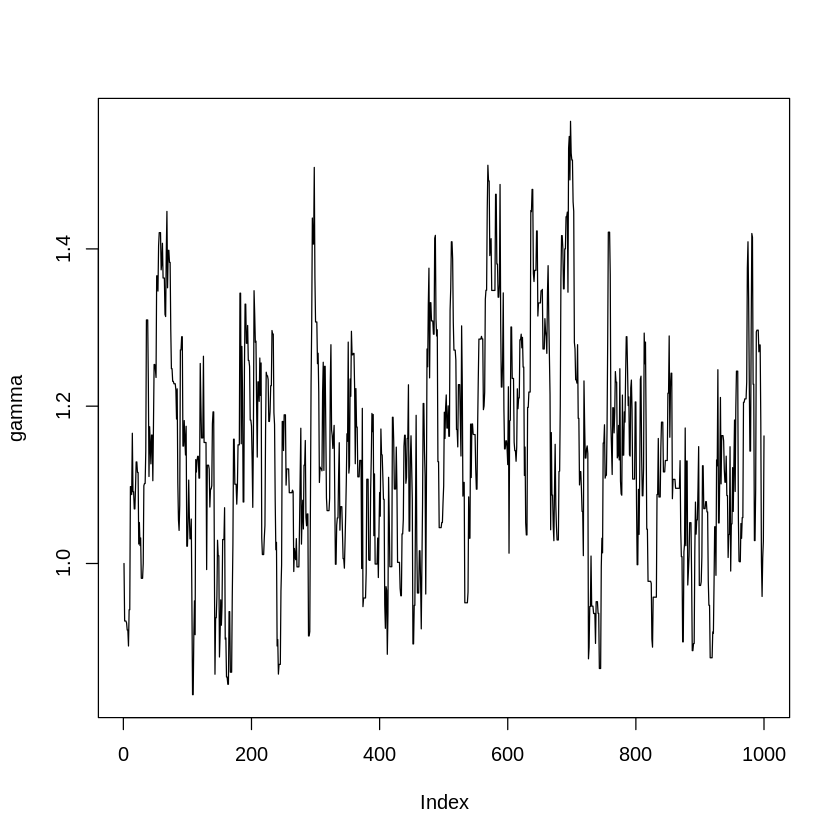

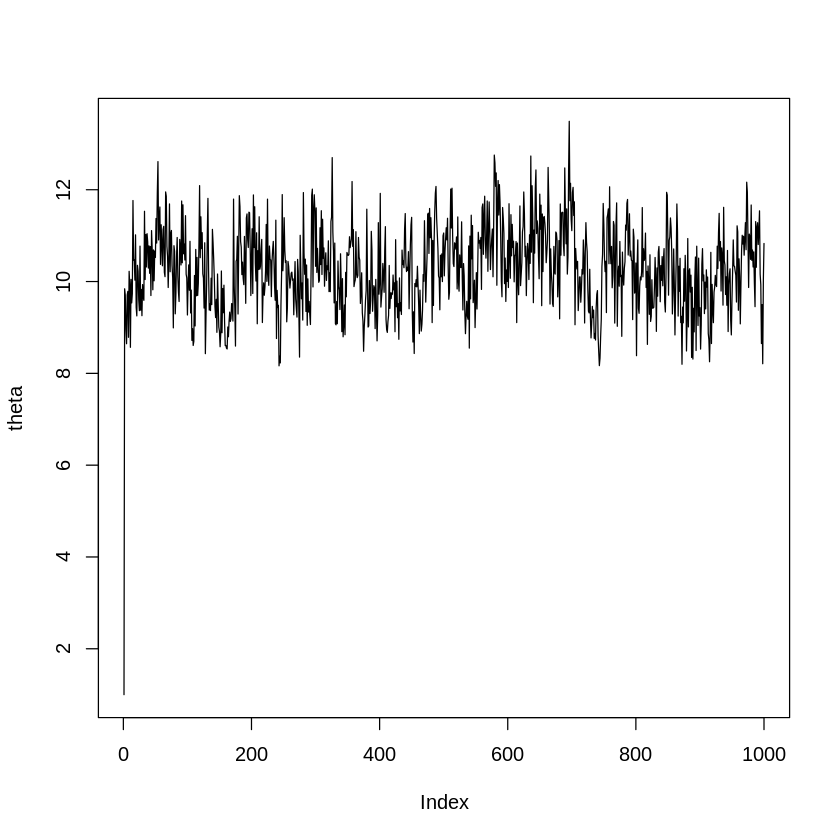

In [ ]:
theta = rep(1, S)
gamma = rep(1, S)

gamma.lfc = function(gamma, theta) {
  -nb*theta/gamma - gamma*beta + (sum(ya) + 1 - alpha)*log(1/gamma)
}

for (iter in 2:S) {

  gamma.star = rnorm(1, gamma[iter - 1], 0.1)

  if (gamma.star < 0) {
    aprob = 0
  } else {
    num = gamma.lfc(gamma.star, theta[iter - 1])
    denom = gamma.lfc(gamma[iter - 1], theta[iter - 1])
    aprob = exp(num - denom)
  }

  # cat ('gamma[iter - 1] is ', gamma[iter - 1], '\n')
  # cat( "gamma.star ", gamma.star, '\n')

  gamma[iter] = ifelse(aprob > runif(1, 0, 1), gamma.star, gamma[iter - 1])

  theta[iter] = rgamma(1, sum(ya) + sum(yb) + a - 1, na + nb/gamma[iter] + b)
}

plot(gamma, type = 'l')
plot(theta, type = 'l')

In [ ]:
mean(theta[0.1*S:S])
mean(gamma[0.1*S:S])

[1] 9.271862

[1] 1.022002

#redo

[1] 10.59325

[1] 0.835633

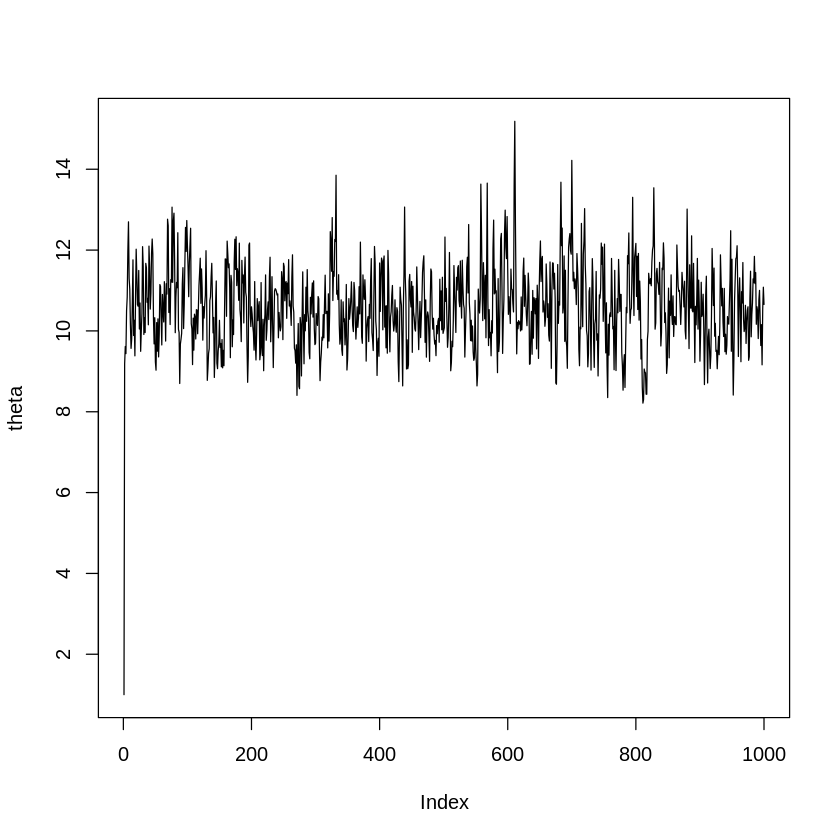

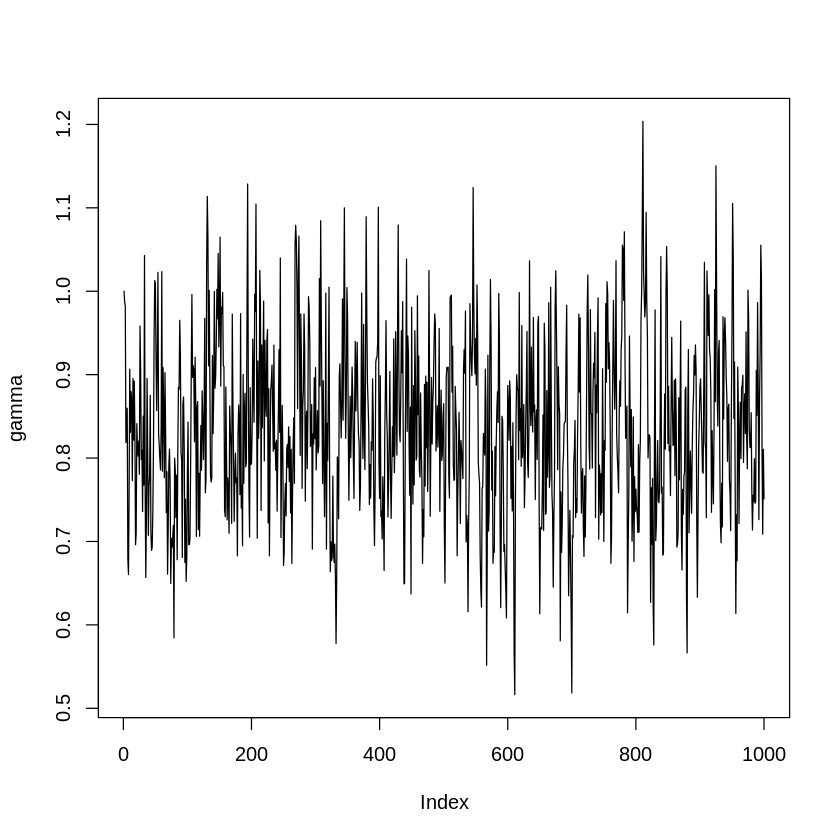

In [ ]:
ya = c(12,9,12,14,13,13,15,8,15,6)
yb = c(11,11,10,9,9,8,7,10,6,8,8,9,7)

na = length(ya)
nb = length(yb)


theta = gamma = c()

theta[1] = gamma[1] = 1

S = 1e3

for (iter in 2:S) {

  theta[iter] = rgamma(1, sum(ya) + sum(yb) + 2, na + nb*gamma[iter - 1] + 1)

  gamma[iter] = rgamma(1, sum(yb) + 8, nb*theta[iter] + 8)

}

mean(theta)
mean(gamma)

plot(theta, type = 'l')
plot(gamma, type = 'l')

In [ ]:
mean(theta[0.1*S:S])
mean(gamma[0.1*S:S])

[1] 12.10495

[1] 0.7829439

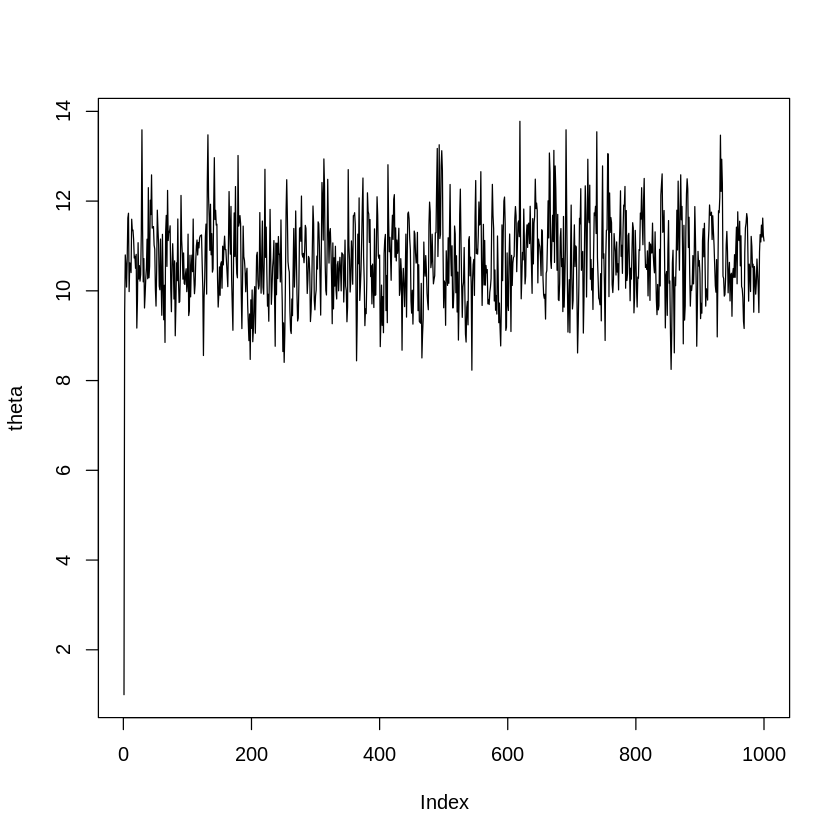

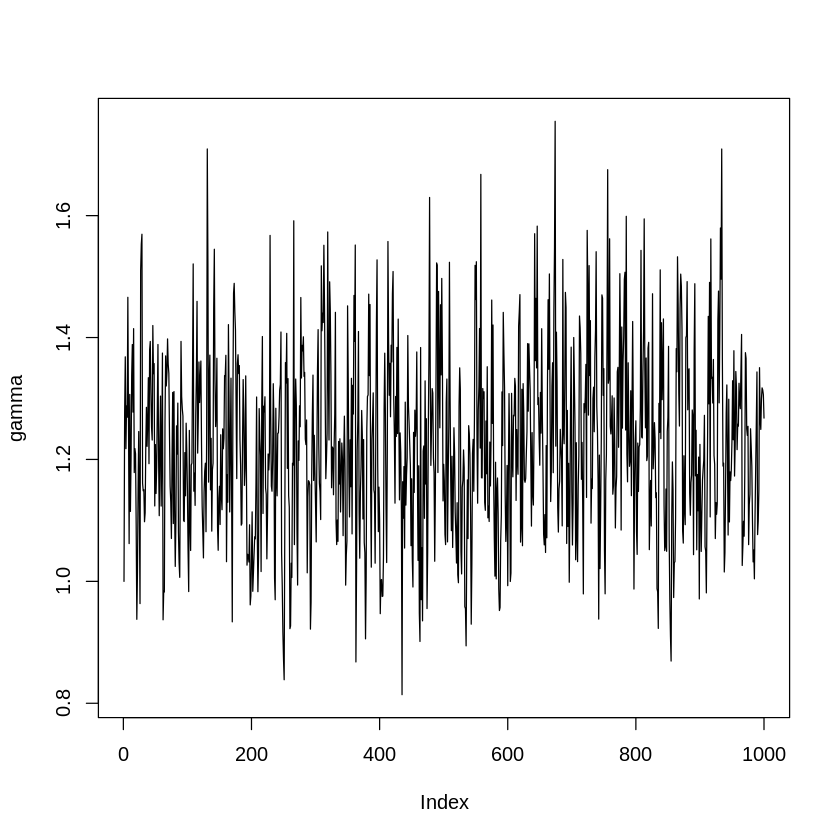

In [ ]:
# (b)


theta = gamma = c()

theta[1] = gamma[1] = 1

S = 1e3

for (iter in 2:S) {

  theta[iter] = rgamma(1, sum(ya) + sum(yb) + 2, na + (nb/gamma[iter - 1]) + 1)

  gamma[iter] = 1/rgamma(1, 8+sum(yb), nb*theta[iter] + 8)

}

# mean(theta)
# mean(gamma)

plot(theta, type = 'l')
plot(gamma, type = 'l')


In [ ]:
mean(theta[0.1*S:S])
mean(gamma[0.1*S:S])

[1] 10.16297

[1] 1.149189

In [ ]:
# (c)

# will use MH not gibbs

jumping = function (theta, scale) {

  rnorm(1, theta, scale)

}
theta.fc = function(theta, gamma) {

  rgamma(1, sum(ya) + sum(yb) + 2, na + (nb/gamma) + 1)
}

sims = 1e3

theta = gamma = c()
theta[1] = gamma[1] = 1

for (i in 2:sims) {

  theta_star = jumping(theta[i-1], 0.1)


  r = min(
        exp(log(theta.fc(theta_star, gamma[i - 1]))) - exp(log(theta.fc(theta[i-1], gamma[i-1]))), 
        1
        )

  # r.all[i] = r

  print(r)

  if(r < runif(1, 0, 1)) {
    theta[i] = theta_star
  } else {
    theta[i] = theta[i-1]
  }  

}

[1] 1


Warning message in rgamma(1, sum(ya) + sum(yb) + 2, na + (nb/gamma) + 1):
“NAs produced”
Warning message in rgamma(1, sum(ya) + sum(yb) + 2, na + (nb/gamma) + 1):
“NAs produced”


[1] NaN


ERROR: ignored

[1] 1.301945

[1] 10.80136

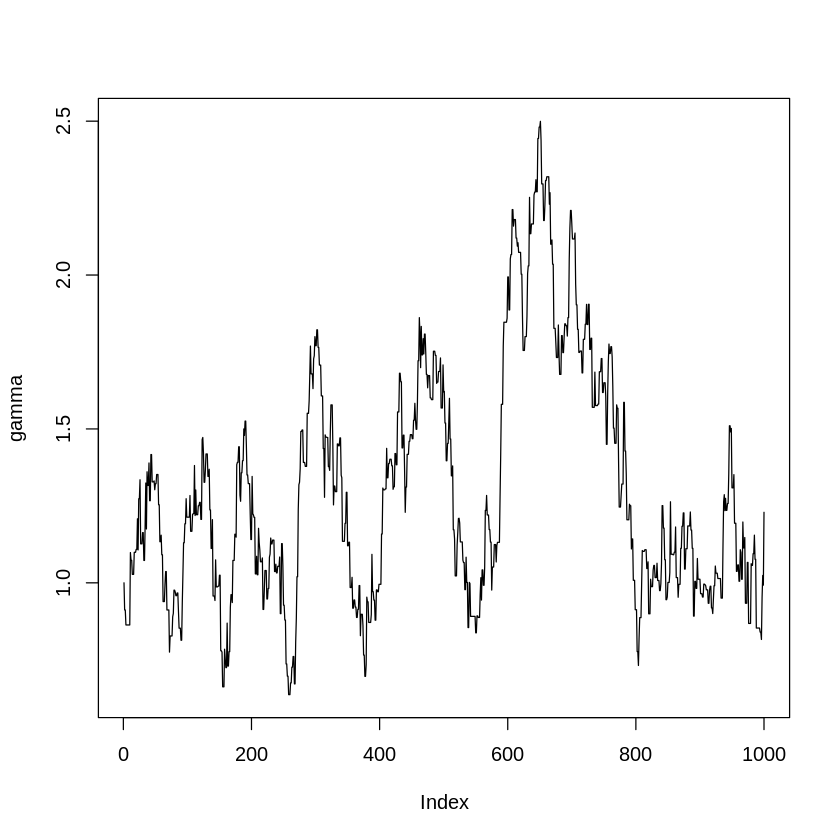

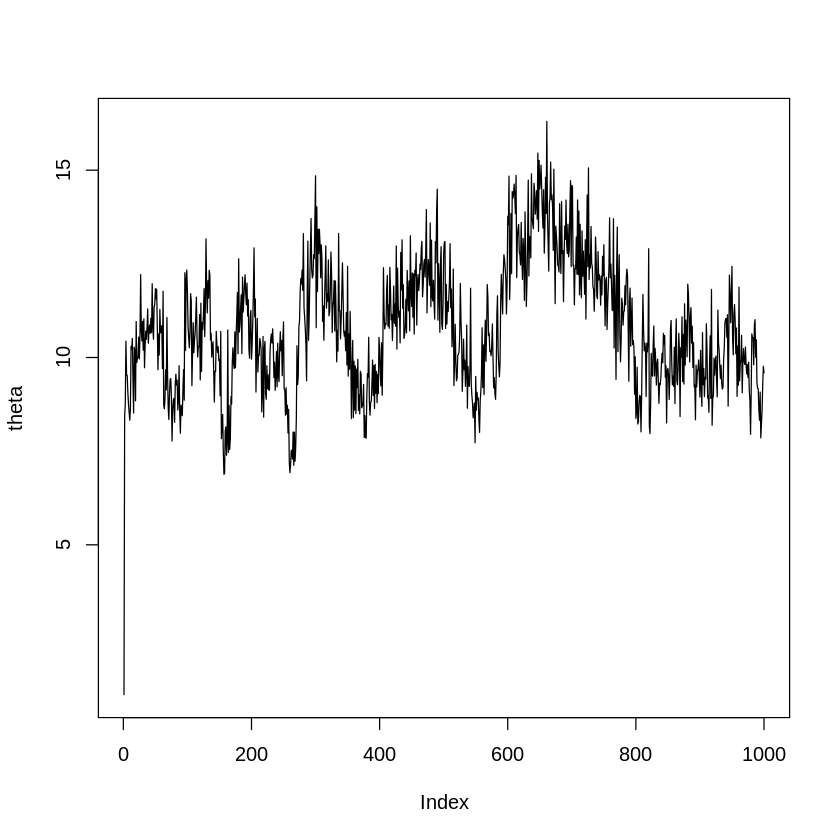

In [ ]:
S = 1e3

theta = gamma = c()
theta[1] = gamma[1] = 1

gamma_fc = function(gamma, theta) {
  exp(-nb*theta/gamma -8*gamma) * gamma^(7) * (1/gamma)^sum(yb)
} 

theta_fc = function(gamma, theta) {
  rgamma(1, sum(ya) + sum(yb) + 2, na + (nb/gamma) + 1)
}

for (iter in 2:S) {

  theta[iter] = rgamma(1, sum(ya) + sum(yb) + 2, na + (nb/gamma[iter - 1]) + 1)

  gamma_star = rnorm(1, gamma[iter - 1], 0.1)

  if (gamma_star < 0) {
    aprob = 0
  } else {
    num = log(gamma_fc(gamma_star, theta[iter - 1]))
    denom = log(gamma_fc(gamma[iter - 1], theta[iter]))
    aprob = exp(num - denom)
  }

  gamma[iter] = ifelse(aprob > runif(1, 0, 1), gamma_star, gamma[iter - 1])

}


# for (iter in 2:S) {

#   theta_star = rnorm(1, theta[iter - 1], 0.1)

#   gamma[iter] = gamma_fc(gamma[iter - 1], theta)

#   num = log(theta_fc(gamma[iter], theta_star))
#   denom = log(theta_fc(gamma[iter - 1], theta[iter - 1]))
#   aprob = exp(num - denom)

#   theta[iter] = ifelse(aprob > runif(1, 0, 1), theta_star, theta[iter - 1])

# } 


plot(gamma, type = 'l')
plot(theta, type = 'l')

In [ ]:
mean(gamma)
mean(theta)